# 以爬山演算法解決Knapsack問題
以python實作爬山演算法，對[p06](https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html)資料集迭代100次後，得出收斂結果，並產生圖形。

## HC (Hill Climbing)簡介
進行下列操作：
* Initilization
  - 固定陣列大小後，在每個index隨機生成0或1，以此筆資料進行之後動作。
* Transition
  - 隨機置換：隨機挑選資料Index將0->1（或1->0）。
  - 鄰近置換：隨機挑選初始index，再隨機選擇其左或右，將0->1（或1->0）。
* Evaluation
  - 算出profit，將用以選擇是否留下transition作為結果
* Determination
  - 參考evaluation結果做出留下或淘汰的決定

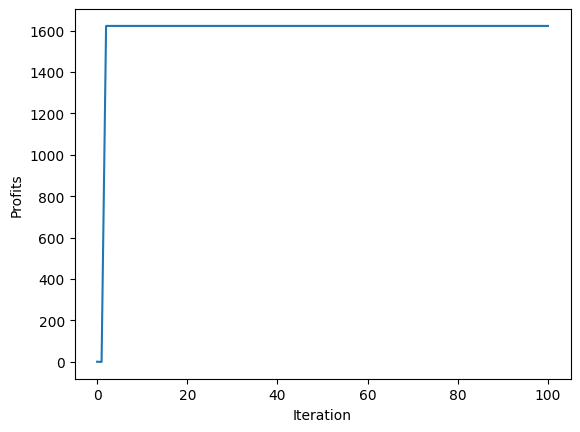

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np


idx_current = 0 #記錄transition更新的index
idx_last = 0

# 初始化：生成01隨機分佈的陣列
def initialize( data_list ):
    initList = []
    global idx_current, idx_last
    idx_last = idx_current
    idx_current = random.randint(0, len(data_list)-1)
    for i in range(len(data_list)):
        initList.append(random.choice([0,1]))
    return initList

# 以隨機置換的方法實行transition
def transition_random( data_list ): #random transition
    global idx_current, idx_last
    hcIdx = random.randint(0, len(data_list)-1)
    if data_list[hcIdx] == 1:
        data_list[hcIdx] = 0
    else:
        data_list[hcIdx] = 1
    idx_last = idx_current
    idx_current = hcIdx
    return data_list

# 第二種置換方法，更改左或右index的數值
def transition_neighbor( data_list ): #randomneighbor transition
    global idx_current, idx_last
    step = random.choice([-1,1])
    idx = idx_current + step
    if data_list[idx] == 1:
        data_list[idx] = 0
    else:
        data_list[idx] = 1
    idx_last = idx_current
    idx_current = idx
    return data_list


# 計算profits，之後以determine來決定資料好壞
def evaluate( capacity , wList, pList, dataList):
    weight = 0
    profit = 0
    for i in range(len(dataList)):
        if dataList[i] == 1:
            weight += wList[i]
            profit += pList[i]
    if weight > capacity:
        return -1
    else:
        return profit

# 選擇要留下置換資料還是維持原樣
def determine(org, trans, capacity, wList, pList):
    global idx_current, idx_last
    if evaluate(capacity, wList, pList, trans) >= evaluate(capacity, wList, pList, org):
        return trans
    else:
        idx_current = idx_last
        return org

# 導入資料
p06_c = 170
p06_w = [41, 50, 49, 59, 55, 57, 60]
p06_p = [442, 525, 511, 593, 546, 564, 617]
p06_s = [0, 1, 0, 1, 0, 0, 1]

origList = []
dataList = initialize(p06_w)
cnt = 0

# 建立迭代、profit數值容器
iterations = [0]
profits = [0]
## 設定迭代器數值為100
while cnt != 100:
    cnt+=1
    ### 製作原資料副本
    origList = dataList.copy()
    ### 製作置換資料
    dataList = transition_random(dataList)
    ### 比較資料作出取捨
    dataList = determine(origList, dataList, p06_c, p06_w, p06_p).copy()
    iterations.append(cnt)
    profits.append(evaluate(p06_c, p06_w, p06_p,dataList))

# 繪製圖形
xpoints = np.array(iterations)
ypoints = np.array(profits)
plt.plot(xpoints, ypoints)
plt.xlabel('Iteration')
plt.ylabel('Profits')
plt.show()